**Import Needed Stuff**

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.6.0


**Import Dataset**

In [2]:
reuters = keras.datasets.reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

**Look at Dataset**

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 8982, labels: 8982


In [4]:
len(train_data[0]), len(train_data[1])

(87, 56)

In [5]:
#Dictionary
word_index = reuters.get_word_index(path="reuters_word_index.json")

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_story(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [6]:
decode_story(train_data[0])

u'<START> <UNK> <UNK> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

**Scale Dataset**

In [7]:
max_length = 0
for i in range(8982):
    if len(train_data[i]) > max_length:
        max_length = len(train_data[i])
        max_review = i

print("Max length = ", max_length, ", story number ", max_review)

Max length =  2376 , story number  8699


In [8]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=max_length)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=max_length)

**Create Model**

In [9]:
# input shape is the vocabulary count used for the news stories (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(46, activation=tf.nn.softmax))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total params: 168,110
Trainable params: 168,110
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

**Train Model**

In [11]:
history = model.fit(train_data,
                    train_labels,
                    validation_split=.2,
                   epochs = 50)

Train on 7185 samples, validate on 1797 samples
Epoch 1/50
7185/7185 [==============================]7185/7185 [==============================] - 5s 676us/step - loss: 2.5775 - acc: 0.3328 - val_loss: 2.4003 - val_acc: 0.3450

Epoch 2/50
7185/7185 [==============================]7185/7185 [==============================] - 4s 583us/step - loss: 2.3990 - acc: 0.3534 - val_loss: 2.3930 - val_acc: 0.3450

Epoch 3/50
7185/7185 [==============================]7185/7185 [==============================] - 4s 572us/step - loss: 2.3922 - acc: 0.3534 - val_loss: 2.3911 - val_acc: 0.3450

Epoch 4/50
7185/7185 [==============================]7185/7185 [==============================] - 4s 579us/step - loss: 2.3856 - acc: 0.3534 - val_loss: 2.3814 - val_acc: 0.3450

Epoch 5/50
7185/7185 [==============================]7185/7185 [==============================] - 4s 562us/step - loss: 2.3763 - acc: 0.3534 - val_loss: 2.3671 - val_acc: 0.3450

Epoch 6/50
7185/7185 [==============================]7185

7185/7185 [==============================]7185/7185 [==============================] - 4s 498us/step - loss: 1.3367 - acc: 0.6654 - val_loss: 1.4288 - val_acc: 0.6516

Epoch 47/50
7185/7185 [==============================]7185/7185 [==============================] - 3s 481us/step - loss: 1.3269 - acc: 0.6682 - val_loss: 1.4227 - val_acc: 0.6583

Epoch 48/50
7185/7185 [==============================]7185/7185 [==============================] - 3s 484us/step - loss: 1.3148 - acc: 0.6738 - val_loss: 1.4127 - val_acc: 0.6522

Epoch 49/50
7185/7185 [==============================]7185/7185 [==============================] - 4s 506us/step - loss: 1.3039 - acc: 0.6742 - val_loss: 1.4086 - val_acc: 0.6661

Epoch 50/50
7185/7185 [==============================]7185/7185 [==============================] - 3s 484us/step - loss: 1.2958 - acc: 0.6804 - val_loss: 1.3984 - val_acc: 0.6589



**Look at results**

In [12]:
results = model.evaluate(test_data, test_labels)

print(results)

2246/2246 [==============================]2246/2246 [==============================] - 0s 85us/step

[1.4751674678850046, 0.6442564559747147]


In [13]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

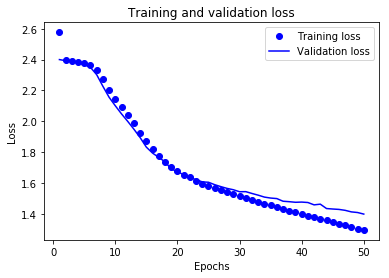

In [14]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

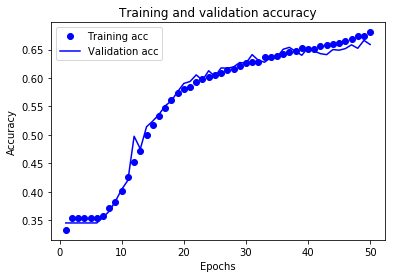

In [15]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()